# Импорт

In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [2]:
field_size = 6

In [3]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2

In [4]:
print(feromon_map)

[[0.89615449 0.26509816 0.35194467 0.77516943 0.35429048 0.30466736]
 [0.26509816 0.33134216 0.06671228 0.59757322 0.15849235 0.65697048]
 [0.35194467 0.06671228 0.01494912 0.2870919  0.13474605 0.50695169]
 [0.77516943 0.59757322 0.2870919  0.73951186 0.70372799 0.85840461]
 [0.35429048 0.15849235 0.13474605 0.70372799 0.85036857 0.49784921]
 [0.30466736 0.65697048 0.50695169 0.85840461 0.49784921 0.6588814 ]]


In [5]:
print(distance_map)

[[0.58185761 0.40364717 0.4163361  0.85686247 0.51778593 0.26134667]
 [0.40364717 0.96314071 0.53265046 0.50386481 0.72513151 0.04432224]
 [0.4163361  0.53265046 0.8895699  0.48829428 0.42722655 0.45734373]
 [0.85686247 0.50386481 0.48829428 0.28802887 0.76565542 0.61512551]
 [0.51778593 0.72513151 0.42722655 0.76565542 0.55808439 0.8444053 ]
 [0.26134667 0.04432224 0.45734373 0.61512551 0.8444053  0.03019568]]


In [6]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


In [7]:
def random_experement(ant: Ant, 
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=[np.random.randint(0, field_size), 
                              np.random.randint(0, field_size)], 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [8]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=pos, 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [9]:
ant = Ant(walk_distance=field_size+1, a=1, b=3)
feromon_map_updaters_with_different_feromon_volume = [TrackOfWalk(feromon_volume=field_size*i*0.5, feromon_erosion_speed=0.9) for i in range(1, 8)]
feromon_map_updaters_with_different_feromon_erosion_speed = [TrackOfWalk(feromon_volume=field_size, feromon_erosion_speed=(i-1)/i) for i in range(1, 8)]

# Опыт со случайной расстановкой при разных объёмах феромона.

Сравнение результатов при разных объёмах феромона.

In [10]:
results = list()
for feromon_map_updater in feromon_map_updaters_with_different_feromon_volume:
    results.append(random_experement(ant=ant, 
                                     feromon_map_updater=feromon_map_updater, 
                                     feromon_map=feromon_map, 
                                     distance_map=distance_map, 
                                     num_of_iteration=40))

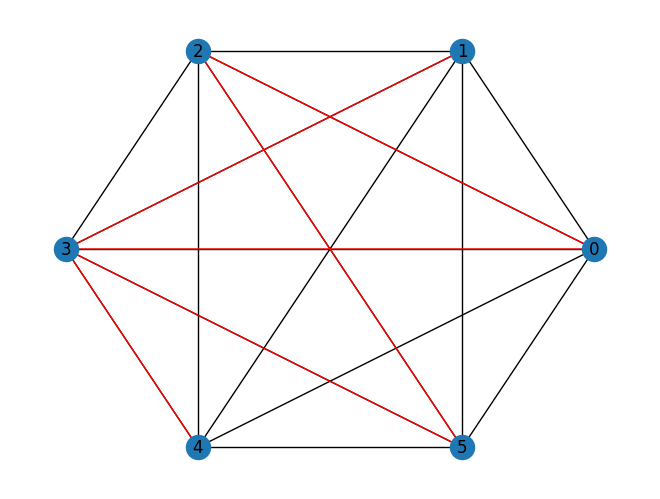

In [11]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


D1 = nx.Graph()

for start, end, length in edges:
    D1.add_edge(start, end, length=length)


nx.draw_circular(D1, with_labels = True)
nx.draw_networkx_edges(D1, nx.circular_layout(D1), edgelist=edges_res, edge_color='r', arrows=True)


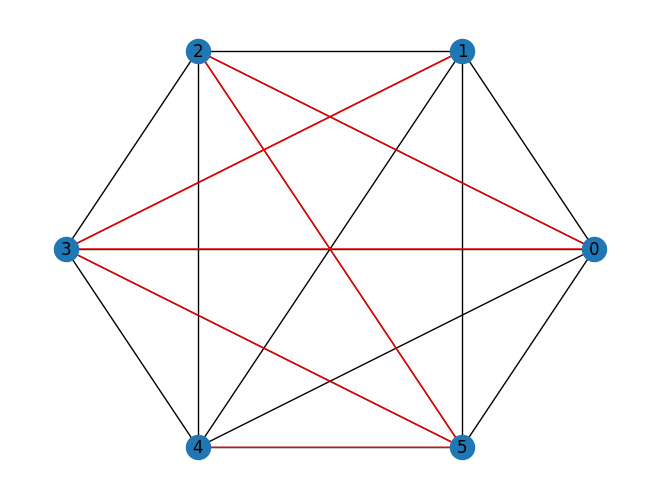

In [12]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


D2 = nx.Graph()

for start, end, length in edges:
    D2.add_edge(start, end, length=length)


nx.draw_circular(D2, with_labels = True)
nx.draw_networkx_edges(D2, nx.circular_layout(D2), edgelist=edges_res, edge_color='r', arrows=True)


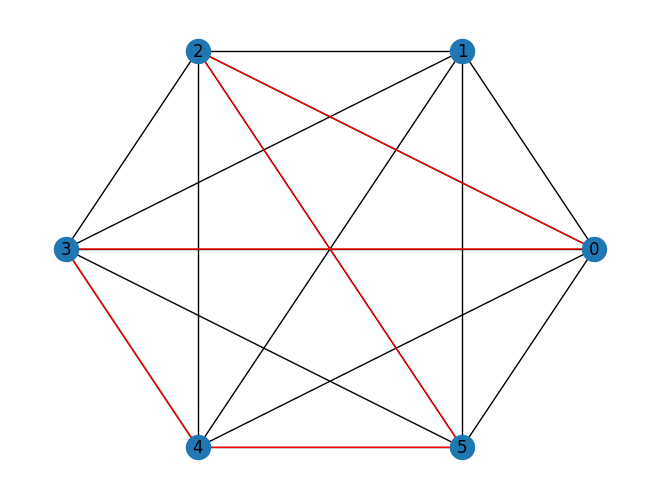

In [13]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


D3 = nx.Graph()

for start, end, length in edges:
    D3.add_edge(start, end, length=length)


nx.draw_circular(D3, with_labels = True)
nx.draw_networkx_edges(D3, nx.circular_layout(D3), edgelist=edges_res, edge_color='r', arrows=True)


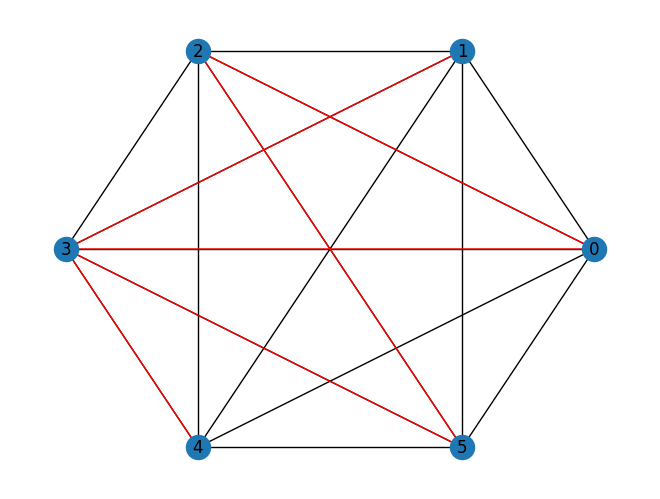

In [14]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


D4 = nx.Graph()

for start, end, length in edges:
    D4.add_edge(start, end, length=length)


nx.draw_circular(D4, with_labels = True)
nx.draw_networkx_edges(D4, nx.circular_layout(D4), edgelist=edges_res, edge_color='r', arrows=True)


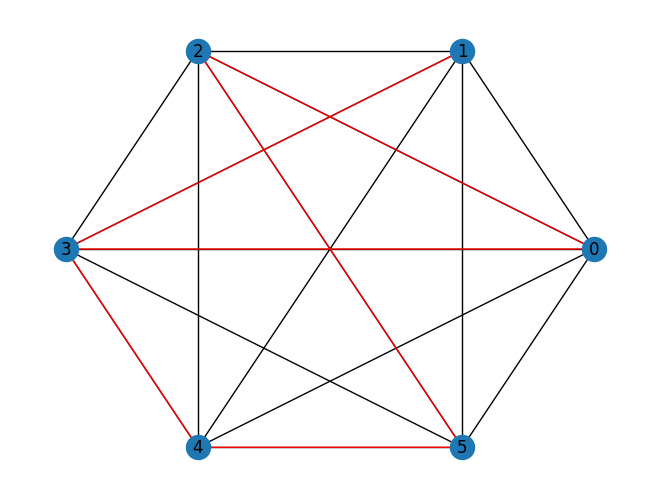

In [15]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


D5 = nx.Graph()

for start, end, length in edges:
    D5.add_edge(start, end, length=length)


nx.draw_circular(D5, with_labels = True)
nx.draw_networkx_edges(D5, nx.circular_layout(D5), edgelist=edges_res, edge_color='r', arrows=True)


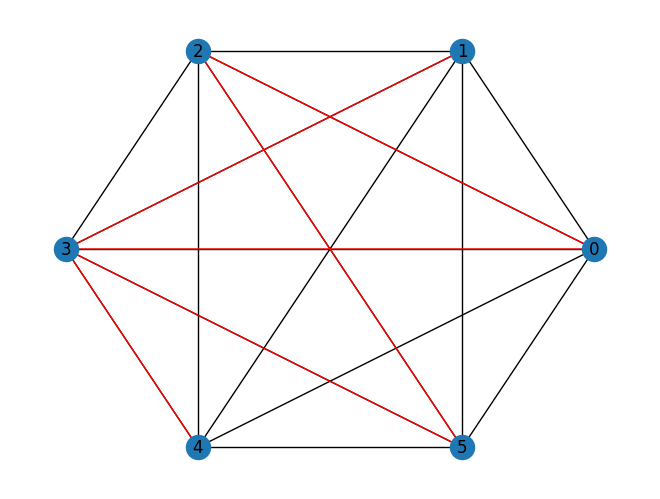

In [16]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


D6 = nx.Graph()

for start, end, length in edges:
    D6.add_edge(start, end, length=length)


nx.draw_circular(D6, with_labels = True)
nx.draw_networkx_edges(D6, nx.circular_layout(D6), edgelist=edges_res, edge_color='r', arrows=True)


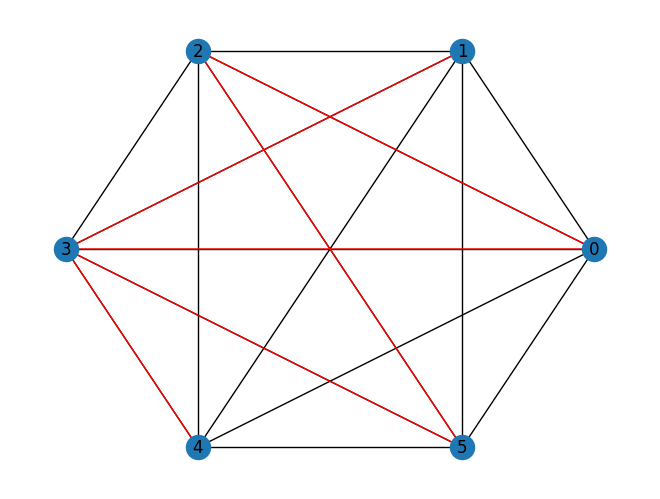

In [17]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


D7 = nx.Graph()

for start, end, length in edges:
    D7.add_edge(start, end, length=length)


nx.draw_circular(D7, with_labels = True)
nx.draw_networkx_edges(D7, nx.circular_layout(D7), edgelist=edges_res, edge_color='r', arrows=True)


# Опыт со случайной расстановкой при разных скоростях испарения феромона.

Сравнение результатов при разных скоростях испарения феромона.

In [18]:
results = list()
for feromon_map_updater in feromon_map_updaters_with_different_feromon_erosion_speed:
    results.append(random_experement(ant=ant, 
                                     feromon_map_updater=feromon_map_updater,
                                     feromon_map=feromon_map, 
                                     distance_map=distance_map, 
                                     num_of_iteration=20))

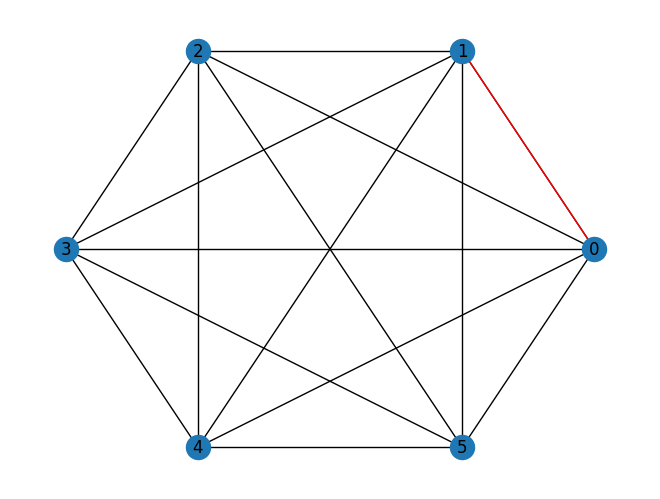

In [19]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F1 = nx.Graph()

for start, end, length in edges:
    F1.add_edge(start, end, length=length)


nx.draw_circular(F1, with_labels = True)
nx.draw_networkx_edges(F1, nx.circular_layout(F1), edgelist=edges_res, edge_color='r', arrows=True)


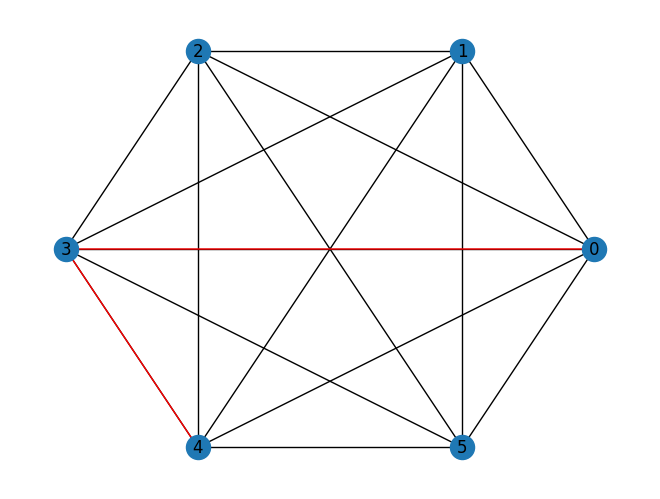

In [20]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F2 = nx.Graph()

for start, end, length in edges:
    F2.add_edge(start, end, length=length)


nx.draw_circular(F2, with_labels = True)
nx.draw_networkx_edges(F2, nx.circular_layout(F2), edgelist=edges_res, edge_color='r', arrows=True)


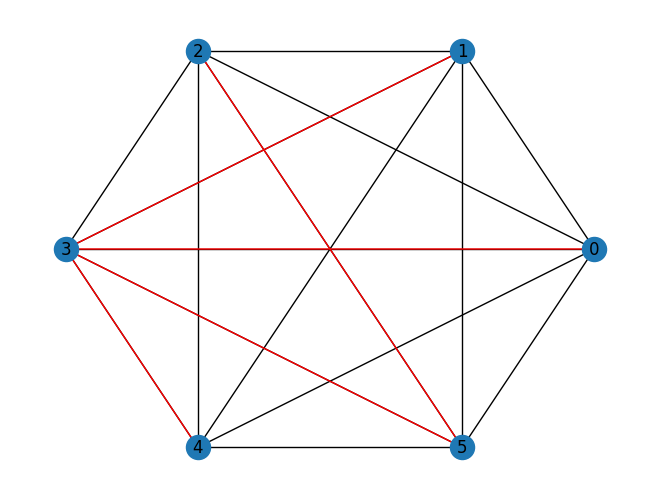

In [21]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F3 = nx.Graph()

for start, end, length in edges:
    F3.add_edge(start, end, length=length)


nx.draw_circular(F3, with_labels = True)
nx.draw_networkx_edges(F3, nx.circular_layout(F3), edgelist=edges_res, edge_color='r', arrows=True)


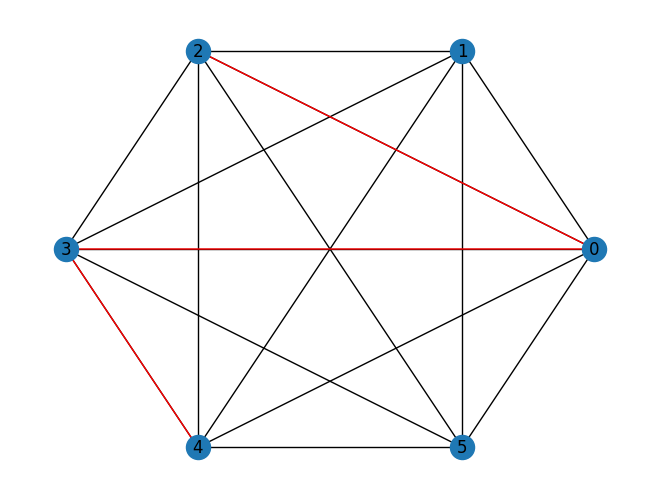

In [22]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F4 = nx.Graph()

for start, end, length in edges:
    F4.add_edge(start, end, length=length)


nx.draw_circular(F4, with_labels = True)
nx.draw_networkx_edges(F4, nx.circular_layout(F4), edgelist=edges_res, edge_color='r', arrows=True)


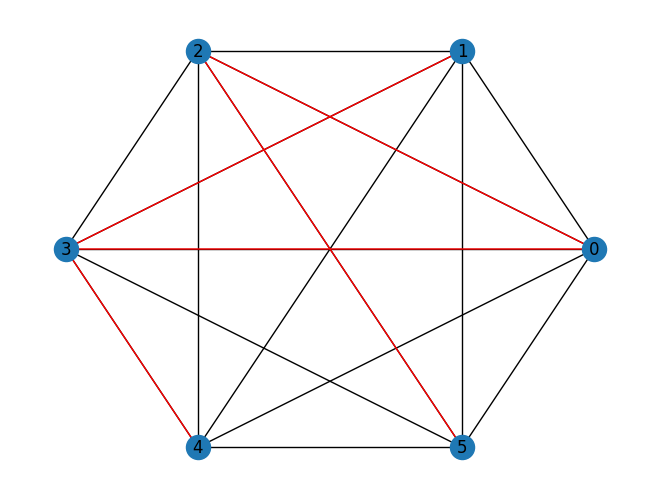

In [23]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F5 = nx.Graph()

for start, end, length in edges:
    F5.add_edge(start, end, length=length)


nx.draw_circular(F5, with_labels = True)
nx.draw_networkx_edges(F5, nx.circular_layout(F5), edgelist=edges_res, edge_color='r', arrows=True)


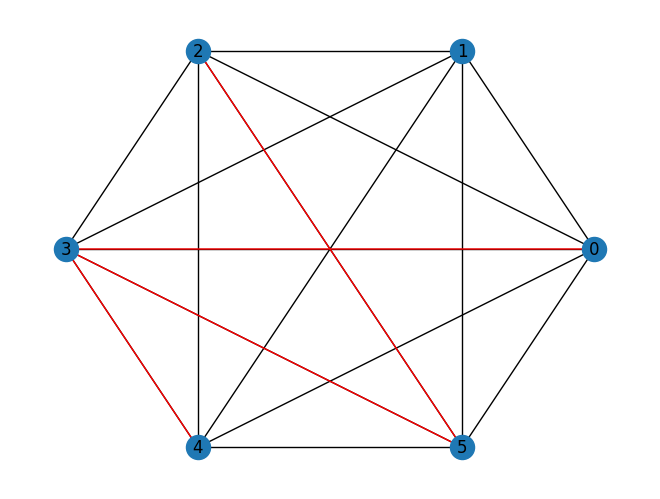

In [24]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F6 = nx.Graph()

for start, end, length in edges:
    F6.add_edge(start, end, length=length)


nx.draw_circular(F6, with_labels = True)
nx.draw_networkx_edges(F6, nx.circular_layout(F6), edgelist=edges_res, edge_color='r', arrows=True)


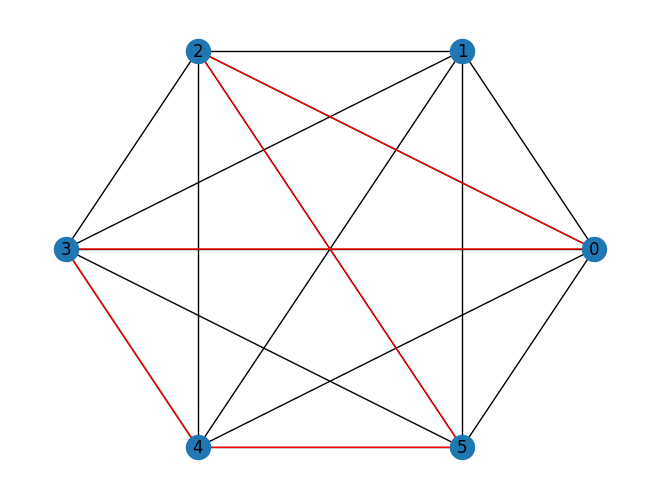

In [25]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


F7 = nx.Graph()

for start, end, length in edges:
    F7.add_edge(start, end, length=length)


nx.draw_circular(F7, with_labels = True)
nx.draw_networkx_edges(F7, nx.circular_layout(F7), edgelist=edges_res, edge_color='r', arrows=True)


# Опыт с фиксированной расстановкой при разных объёмах феромона.

Сравнение результатов при разных объёмах феромона.

In [26]:
results = list()
for feromon_map_updater in feromon_map_updaters_with_different_feromon_volume:
    results.append(experement(ant=ant,
                              pos=[1, 1],
                              feromon_map_updater=feromon_map_updater, 
                              feromon_map=feromon_map, 
                              distance_map=distance_map, 
                              num_of_iteration=40))

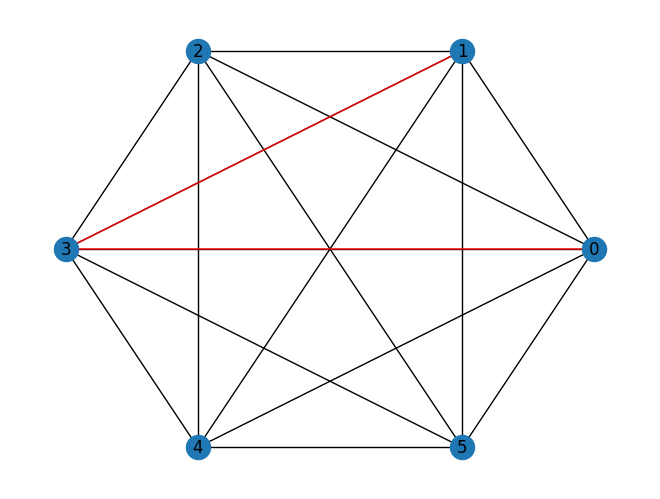

In [27]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G1 = nx.Graph()

for start, end, length in edges:
    G1.add_edge(start, end, length=length)


nx.draw_circular(G1, with_labels = True)
nx.draw_networkx_edges(G1, nx.circular_layout(G1), edgelist=edges_res, edge_color='r', arrows=True)


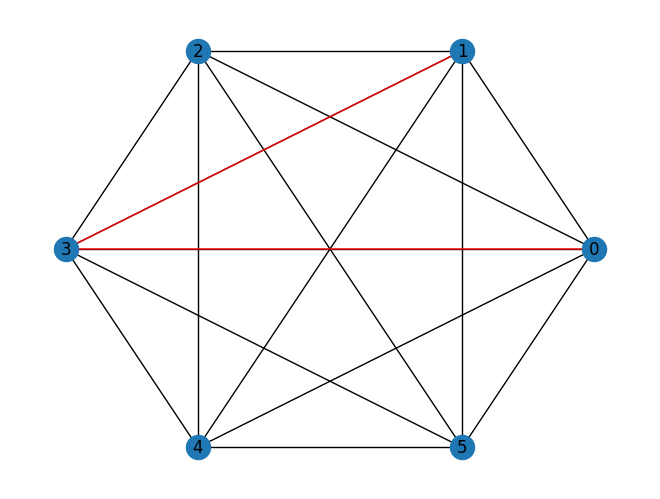

In [28]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G2 = nx.Graph()

for start, end, length in edges:
    G2.add_edge(start, end, length=length)


nx.draw_circular(G2, with_labels = True)
nx.draw_networkx_edges(G2, nx.circular_layout(G2), edgelist=edges_res, edge_color='r', arrows=True)


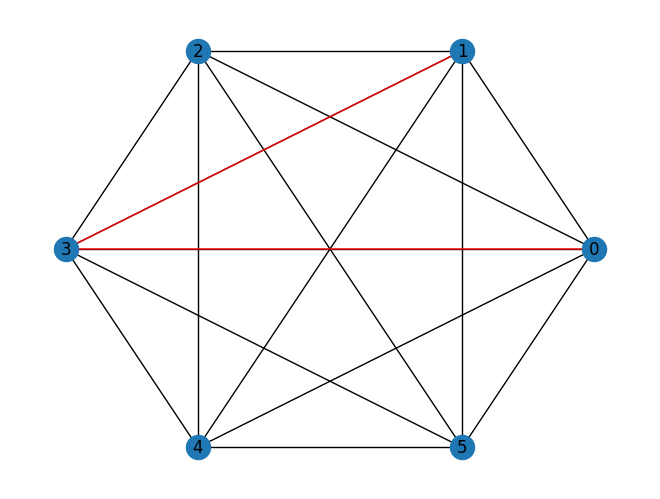

In [29]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G3 = nx.Graph()

for start, end, length in edges:
    G3.add_edge(start, end, length=length)


nx.draw_circular(G3, with_labels = True)
nx.draw_networkx_edges(G3, nx.circular_layout(G3), edgelist=edges_res, edge_color='r', arrows=True)


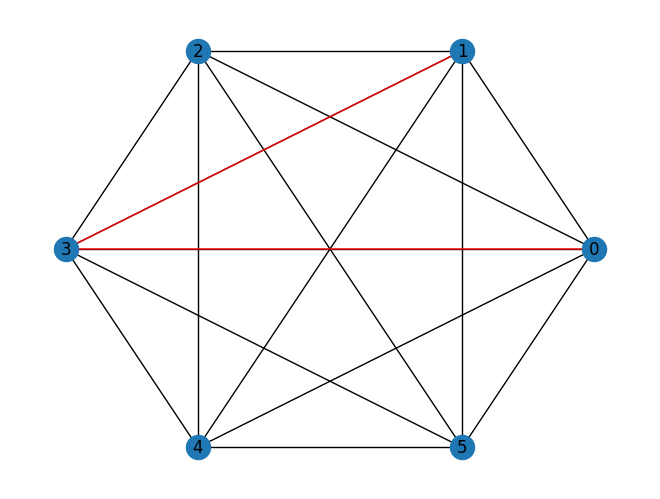

In [30]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G4 = nx.Graph()

for start, end, length in edges:
    G4.add_edge(start, end, length=length)


nx.draw_circular(G4, with_labels = True)
nx.draw_networkx_edges(G4, nx.circular_layout(G4), edgelist=edges_res, edge_color='r', arrows=True)


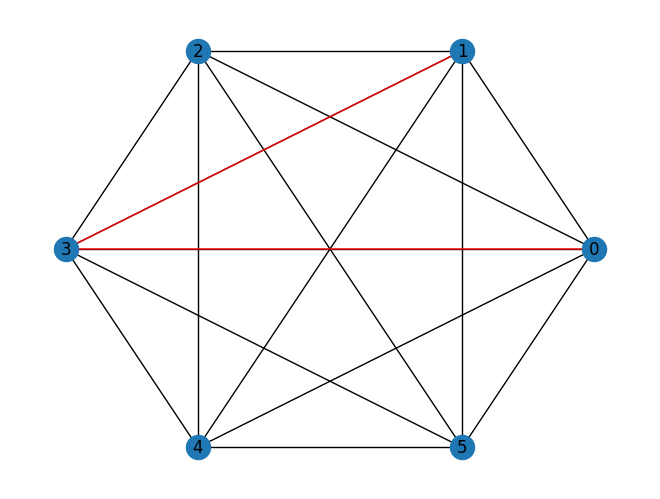

In [31]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G5 = nx.Graph()

for start, end, length in edges:
    G5.add_edge(start, end, length=length)


nx.draw_circular(G5, with_labels = True)
nx.draw_networkx_edges(G5, nx.circular_layout(G5), edgelist=edges_res, edge_color='r', arrows=True)


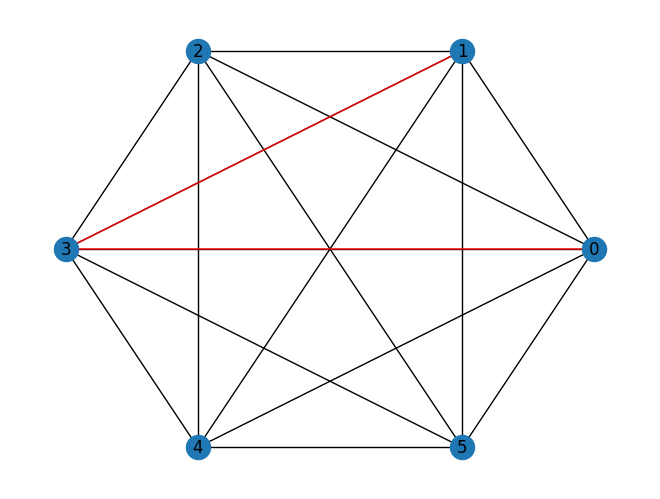

In [32]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G6 = nx.Graph()

for start, end, length in edges:
    G6.add_edge(start, end, length=length)


nx.draw_circular(G6, with_labels = True)
nx.draw_networkx_edges(G6, nx.circular_layout(G6), edgelist=edges_res, edge_color='r', arrows=True)


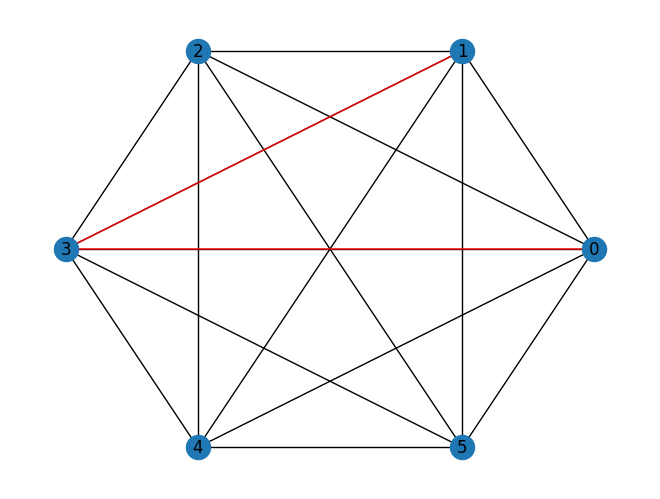

In [33]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


G7 = nx.Graph()

for start, end, length in edges:
    G7.add_edge(start, end, length=length)


nx.draw_circular(G7, with_labels = True)
nx.draw_networkx_edges(G7, nx.circular_layout(G7), edgelist=edges_res, edge_color='r', arrows=True)


# Опыт с фиксированной расстановкой при разных скоростях испарения феромона.

Сравнение результатов при разных скоростях испарения феромона.

In [34]:
results = list()
for feromon_map_updater in feromon_map_updaters_with_different_feromon_erosion_speed:
    results.append(experement(ant=ant,
                              pos=[1, 1],
                              feromon_map_updater=feromon_map_updater, 
                              feromon_map=feromon_map, 
                              distance_map=distance_map, 
                              num_of_iteration=40))

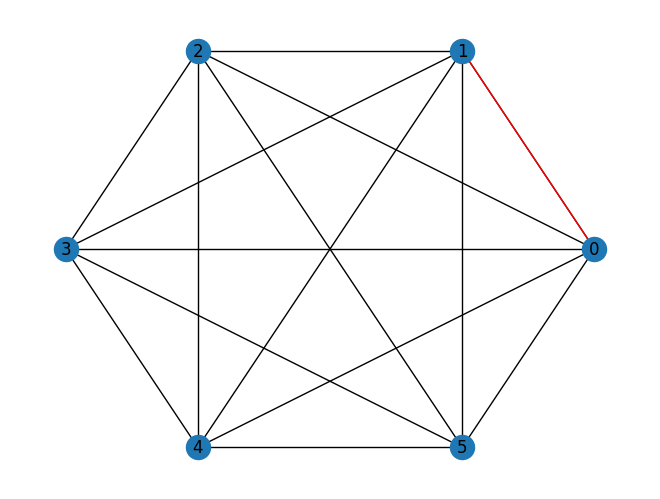

In [35]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)


nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=edges_res, edge_color='r', arrows=True)


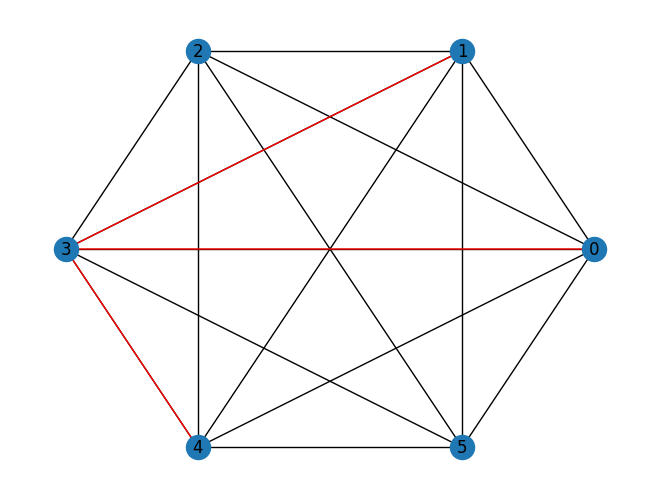

In [36]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K2 = nx.Graph()

for start, end, length in edges:
    K2.add_edge(start, end, length=length)


nx.draw_circular(K2, with_labels = True)
nx.draw_networkx_edges(K2, nx.circular_layout(K2), edgelist=edges_res, edge_color='r', arrows=True)


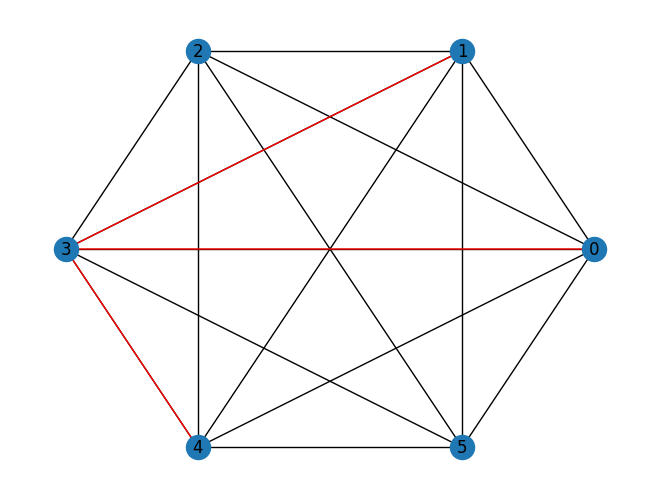

In [37]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K3 = nx.Graph()

for start, end, length in edges:
    K3.add_edge(start, end, length=length)


nx.draw_circular(K3, with_labels = True)
nx.draw_networkx_edges(K3, nx.circular_layout(K3), edgelist=edges_res, edge_color='r', arrows=True)


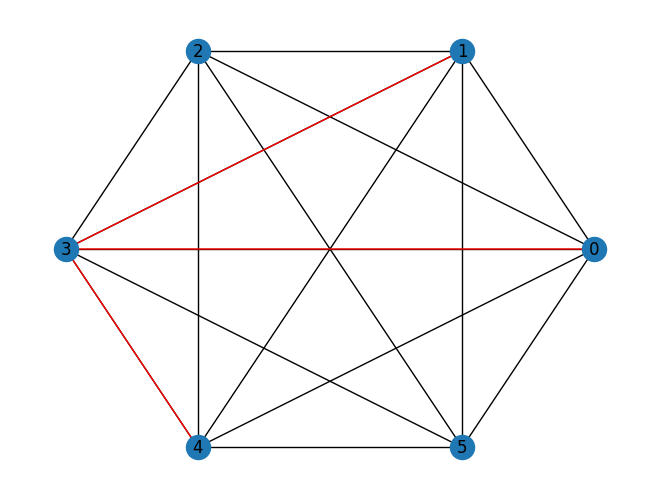

In [38]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K4 = nx.Graph()

for start, end, length in edges:
    K4.add_edge(start, end, length=length)


nx.draw_circular(K4, with_labels = True)
nx.draw_networkx_edges(K4, nx.circular_layout(K4), edgelist=edges_res, edge_color='r', arrows=True)


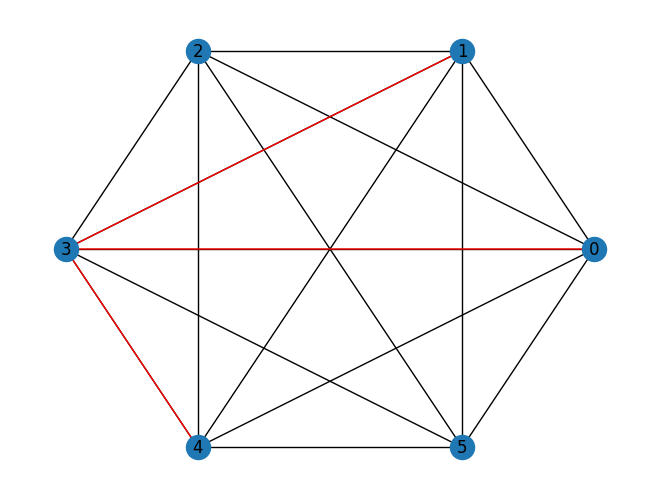

In [39]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K5 = nx.Graph()

for start, end, length in edges:
    K5.add_edge(start, end, length=length)


nx.draw_circular(K5, with_labels = True)
nx.draw_networkx_edges(K5, nx.circular_layout(K5), edgelist=edges_res, edge_color='r', arrows=True)


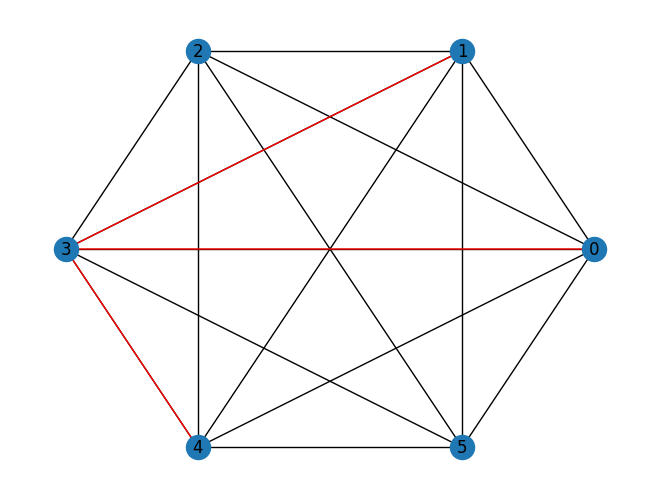

In [40]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K6 = nx.Graph()

for start, end, length in edges:
    K6.add_edge(start, end, length=length)


nx.draw_circular(K6, with_labels = True)
nx.draw_networkx_edges(K6, nx.circular_layout(K6), edgelist=edges_res, edge_color='r', arrows=True)


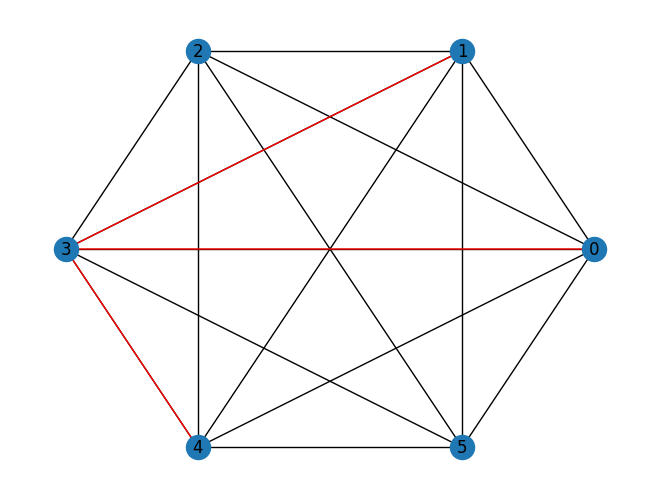

In [41]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K7 = nx.Graph()

for start, end, length in edges:
    K7.add_edge(start, end, length=length)


nx.draw_circular(K7, with_labels = True)
nx.draw_networkx_edges(K7, nx.circular_layout(K7), edgelist=edges_res, edge_color='r', arrows=True)
